In [2]:
import pandas as pd

project_dir = '/Users/David/Work/data_science/food_environment/'

# Source data from https://catalog.data.gov/dataset/food-environment-atlas-f4a22
# Simply exported each spreadsheet in Excel to CSV
restaurants = pd.read_csv(project_dir + 'data/RESTAURANTS.csv')
restaurants.head()

,FIPS,State,County,FFR09,FFR14,PCH_FFR_09_14,FFRPTH09,FFRPTH14,PCH_FFRPTH_09_14,FSR09,FSR14,PCH_FSR_09_14,FSRPTH09,FSRPTH14,PCH_FSRPTH_09_14,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,1001,AL,Autauga,30,36,20.000000,0.554170,0.649878,17.270512,34,29,-14.705882,0.628059,0.523513,-16.645960,649.511367,674.80272,484.381507,512.280987
1,1003,AL,Baldwin,112,132,17.857143,0.624282,0.659634,5.662750,202,221,9.405941,1.125938,1.104387,-1.914027,649.511367,674.80272,484.381507,512.280987
2,1005,AL,Barbour,21,22,4.761905,0.759301,0.818239,7.762116,12,15,25.000000,0.433887,0.557890,28.579797,649.511367,674.80272,484.381507,512.280987
3,1007,AL,Bibb,7,5,-28.571429,0.305131,0.222163,-27.190844,6,5,-16.666667,0.261540,0.222163,-15.055985,649.511367,674.80272,484.381507,512.280987
4,1009,AL,Blount,24,21,-12.500000,0.418549,0.363832,-13.073035,19,15,-21.052632,0.331351,0.259880,-21.569656,649.511367,674.80272,484.381507,512.280987


In [3]:
variable_list = pd.read_csv(project_dir + 'data/Variable_List.csv')
variable_list[variable_list['Category Code'] == 'RESTAURANTS'][['Variable Name','Variable Code']]

,Variable Name,Variable Code
77,"Fast-food restaurants, 2009",FFR09
78,"Fast-food restaurants, 2014",FFR14
79,"Fast-food restaurants (% change), 2009-14",PCH_FFR_09_14
80,"Fast-food restaurants/1,000 pop, 2009",FFRPTH09
81,"Fast-food restaurants/1,000 pop, 2014",FFRPTH14
82,"Fast-food restaurants/1,000 pop (% change), 20...",PCH_FFRPTH_09_14
83,"Full-service restaurants, 2009",FSR09
84,"Full-service restaurants, 2014",FSR14
85,"Full-service restaurants (% change), 2009-14",PCH_FSR_09_14
86,"Full-service restaurants/1,000 pop, 2009",FSRPTH09


In [4]:
# How has the restaurant landscape evolved?
# What's the ratio of fast-food to full-service restaurants over time?
restaurants['FFR_FSR_ratio_09'] = restaurants['FFR09'] / restaurants['FSR09']
restaurants['FFR_FSR_ratio_14'] = restaurants['FFR14'] / restaurants['FSR14']

restaurants[['State', 'County', 'FFR09', 'FSR09', 'FFR_FSR_ratio_09', 'FFR14', 'FSR14', 'FFR_FSR_ratio_14']]

,State,County,FFR09,FSR09,FFR_FSR_ratio_09,FFR14,FSR14,FFR_FSR_ratio_14
0,AL,Autauga,30,34,0.882353,36,29,1.241379
1,AL,Baldwin,112,202,0.554455,132,221,0.597285
2,AL,Barbour,21,12,1.750000,22,15,1.466667
3,AL,Bibb,7,6,1.166667,5,5,1.000000
4,AL,Blount,24,19,1.263158,21,15,1.400000
5,AL,Bullock,4,2,2.000000,3,1,3.000000
6,AL,Butler,17,19,0.894737,17,10,1.700000
7,AL,Calhoun,95,67,1.417910,103,77,1.337662
8,AL,Chambers,22,19,1.157895,26,16,1.625000
9,AL,Cherokee,16,10,1.600000,15,11,1.363636


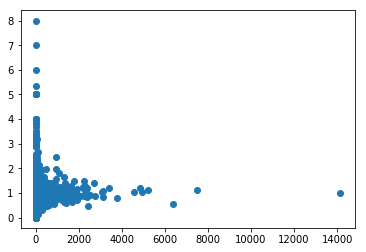

In [5]:
# Do small numbers bias us toward a ratio?
restaurants['total_restaurants_09'] = restaurants['FFR09'] + restaurants['FSR09']
restaurants['total_restaurants_14'] = restaurants['FFR14'] + restaurants['FSR14']

import matplotlib.pyplot as plt

plt.scatter(restaurants['total_restaurants_09'], restaurants['FFR_FSR_ratio_09'])
plt.show()

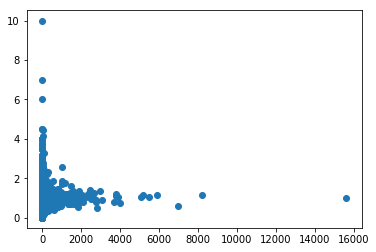

In [6]:
# Looks like a smaller restaurant industry is biased toward greater proportion of FSRs
# Does that also hold true for '14? I'm guessing so

plt.scatter(restaurants['total_restaurants_14'], restaurants['FFR_FSR_ratio_14'])
plt.show()

In [7]:
# I'm barely seeing any change, which makes sense given that restaurants exist for years, and the period is only 5 years
# These outliers could tell us something about these communities
# Are counties with high ratios predominantly "road" towns, with many people passing through and grabbing food as a convenience on their way elsewhere?
# To look at it from the supply side, do these communities lack the resources/conditions to open and operate FSRs, which presumably have more barriers to entry?
# To invert that question, for communities with low ratios, is something "lacking" that keeps them from opening FFRs?

# Interesting that there seems to be a convergence on 1:1 for counties with large industries
# I'm guessing that county with ~16000 restaurants is a county covering NYC or LA
restaurants[restaurants['total_restaurants_14'] > 3000] \
.sort_values(by='total_restaurants_14')

,FIPS,State,County,FFR09,FFR14,PCH_FFR_09_14,FFRPTH09,FFRPTH14,PCH_FFRPTH_09_14,FSR09,...,FSRPTH14,PCH_FSRPTH_09_14,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12,FFR_FSR_ratio_09,FFR_FSR_ratio_14,total_restaurants_09,total_restaurants_14
228,6085,CA,Santa Clara,1282,1434,11.856474,0.726289,0.756886,4.212752,1458,...,0.869838,5.307529,761.447125,642.487458,755.587505,750.318646,0.879287,0.870146,2740,3082
362,12086,FL,Miami-Dade,1430,1640,14.685315,0.580371,0.615876,6.117705,1691,...,0.762710,11.133849,632.337378,530.267589,919.513104,882.935180,0.845653,0.807484,3121,3671
1868,36081,NY,Queens,1583,1960,23.815540,0.713975,0.844253,18.246886,1517,...,0.780934,14.137086,487.557187,482.410232,734.805659,916.417933,1.043507,1.081081,3100,3773
2579,48113,TX,Dallas,1837,2067,12.520414,0.782909,0.820682,4.824680,1554,...,0.687276,3.771544,784.256146,728.768645,658.537240,688.356372,1.182111,1.194107,3391,3798
1851,36047,NY,Kings,1621,1994,23.010487,0.651593,0.760548,16.721443,1494,...,0.735756,22.515247,487.557187,482.410232,734.805659,916.417933,1.085007,1.033696,3115,3923
2970,53033,WA,King,1678,1720,2.502980,0.877610,0.826936,-5.774021,2091,...,1.106268,1.157190,683.838863,505.260816,713.269544,706.806851,0.802487,0.747501,3769,4021
222,6073,CA,San Diego,2332,2632,12.864494,0.761792,0.806513,5.870517,2216,...,0.757485,4.639681,761.447125,642.487458,755.587505,750.318646,1.052347,1.064725,4548,5104
103,4013,AZ,Maricopa,2674,2781,4.001496,0.702985,0.680418,-3.210125,2191,...,0.583286,1.263799,760.500461,577.718809,758.628372,623.588015,1.220447,1.166527,4865,5165
215,6059,CA,Orange,2526,2790,10.451306,0.845614,0.886977,4.891441,2407,...,0.858047,6.486852,761.447125,642.487458,755.587505,750.318646,1.049439,1.033716,4933,5489
2623,48201,TX,Harris,2738,3125,14.134405,0.678585,0.703612,3.688058,2481,...,0.624807,1.612792,784.256146,728.768645,658.537240,688.356372,1.103587,1.126126,5219,5900


In [8]:
# It could be interesting to look at links between restaurant landscape and socioeconomics and public health
# What does the restaurant landscape look like for a physically healthy community? An economically healthy one?
# I'm going to deliberately avoid suggesting any causality for now

# An obvious one is diabetes and diet
# Who with diabetes wants to self-report spending a lot of money on fast food? I wonder how reliable these numbers are
health = pd.read_csv(project_dir + 'data/HEALTH.csv')
health.head()

,FIPS,State,County,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,PCT_HSPA15,RECFAC09,RECFAC14,PCH_RECFAC_09_14,RECFACPTH09,RECFACPTH14,PCH_RECFACPTH_09_14
0,1001,AL,Autauga,11.4,13.0,31.5,34.1,25.4,4,5,25.000000,0.073889,0.090261,22.156783
1,1003,AL,Baldwin,9.8,10.4,26.2,27.4,25.4,18,25,38.888889,0.100331,0.124931,24.518392
2,1005,AL,Barbour,13.6,18.4,37.6,44.4,25.4,1,0,-100.000000,0.036157,0.000000,-100.000000
3,1007,AL,Bibb,11.1,14.8,32.3,40.3,25.4,1,1,0.000000,0.043590,0.044433,1.932818
4,1009,AL,Blount,11.4,14.1,31.9,34.6,25.4,3,3,0.000000,0.052319,0.051976,-0.654897


In [9]:
variable_list = pd.read_csv(project_dir + 'data/Variable_List.csv')
variable_list[variable_list['Category Code'] == 'HEALTH'][['Variable Name','Variable Code']]

,Variable Name,Variable Code
251,"Adult diabetes rate, 2008",PCT_DIABETES_ADULTS08
252,"Adult diabetes rate, 2013",PCT_DIABETES_ADULTS13
253,"Adult obesity rate, 2008",PCT_OBESE_ADULTS08
254,"Adult obesity rate, 2013",PCT_OBESE_ADULTS13
255,"High schoolers physically active (%), 2015*",PCT_HSPA15
256,"Recreation & fitness facilities, 2009",RECFAC09
257,"Recreation & fitness facilities, 2014",RECFAC14
258,"Recreation & fitness facilities (% change), 20...",PCH_RECFAC_09_14
259,"Recreation & fitness facilities/1,000 pop, 2009",RECFACPTH09
260,"Recreation & fitness facilities/1,000 pop, 2014",RECFACPTH14


In [76]:
# Using data from adjacent years to approximate what rates would have been at a given time; too few data points in time
restaurants.merge(health, on='FIPS', suffixes=('', '_y'))[['FIPS', 'State', 'County', 'PC_FFRSALES07', 'PCT_DIABETES_ADULTS08']]


,FIPS,State,County,PC_FFRSALES07,PCT_DIABETES_ADULTS08
0,1001,AL,Autauga,649.511367,11.4
1,1003,AL,Baldwin,649.511367,9.8
2,1005,AL,Barbour,649.511367,13.6
3,1007,AL,Bibb,649.511367,11.1
4,1009,AL,Blount,649.511367,11.4
5,1011,AL,Bullock,649.511367,14.9
6,1013,AL,Butler,649.511367,15.1
7,1015,AL,Calhoun,649.511367,14.5
8,1017,AL,Chambers,649.511367,16.1
9,1019,AL,Cherokee,649.511367,13.6


In [11]:
# PC_FFRSALES07 must be a state average. We lose some of the relationship, to the extent there was one at the county level
restaurants[['State', 'PC_FFRSALES07']].drop_duplicates().sort_values(by='State').reset_index()
# DC accounts for the 51st "state"

,index,State,PC_FFRSALES07
0,67,AK,582.715510
1,0,AL,649.511367
2,111,AR,576.210444
3,96,AZ,760.500461
4,186,CA,761.447125
5,244,CO,747.095794
6,308,CT,569.331080
7,319,DC,1043.860861
8,316,DE,652.446401
9,320,FL,632.337378


In [80]:
# I would be interested in running a two-sample t-test for difference in mean expenditure between diabetic and non-diabetic populations but our data isn't that granular

# Let's look at significance of a regression coefficient being non-zero to get a sense of the relationship
# Since expenditure is just that state average, I'll be more comfortable basing the analysis off of the average diabetes rate for the state
# Otherwise we're suggesting we have more info than we actually have and I think this will bias results toward detecting more significance than there might be
# Let's find out
restaurants_and_health = restaurants.merge(health, on='FIPS', suffixes=('', '_y'))[['FIPS', 'State', 'County', 'PC_FFRSALES07', 'PC_FSRSALES07', 'PCT_DIABETES_ADULTS08']]


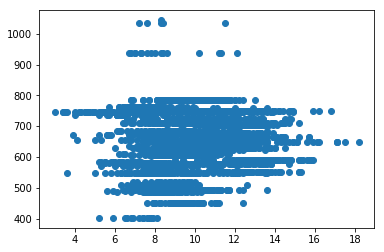

In [81]:
plt.scatter(restaurants_and_health['PCT_DIABETES_ADULTS08'], restaurants_and_health['PC_FFRSALES07'])
plt.show()

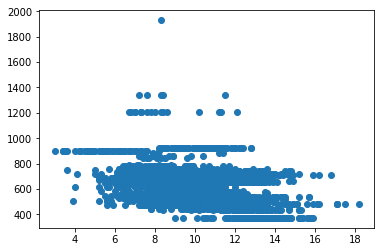

In [82]:
plt.scatter(restaurants_and_health['PCT_DIABETES_ADULTS08'], restaurants_and_health['PC_FSRSALES07'])
plt.show()

In [84]:
# Who is spending that much money on FSRs per capita? Is that LA again?
restaurants_and_health.sort_values(by='PC_FSRSALES07', ascending=False).head()
# Oh hello DC

,FIPS,State,County,PC_FFRSALES07,PC_FSRSALES07,PCT_DIABETES_ADULTS08
319,11001,DC,District of Columbia,1043.860861,1930.155806,8.3
546,15001,HI,Hawaii,1036.480107,1340.014378,7.2
548,15005,HI,Kalawao,1036.480107,1340.014378,11.5
547,15003,HI,Honolulu,1036.480107,1340.014378,8.4
550,15009,HI,Maui,1036.480107,1340.014378,7.6


In [99]:
restaurants_and_health[['State', 'PC_FFRSALES07', 'PC_FSRSALES07', 'PCT_DIABETES_ADULTS08']].groupby(['State', 'PC_FFRSALES07', 'PC_FSRSALES07']).agg(['median', 'mean'])

PCT_DIABETES_ADULTS08           
                                                 median       mean
State PC_FFRSALES07 PC_FSRSALES07                                 
AK    582.715510    688.084194                     6.50   6.458333
AL    649.511367    484.381507                    12.90  13.055224
AR    576.210444    444.921822                    11.20  11.310667
AZ    760.500461    758.628372                     8.40   9.413333
CA    761.447125    755.587505                     7.60   7.606897
CO    747.095794    900.316210                     5.60   5.621875
CT    569.331080    711.000084                     7.65   7.675000
DC    1043.860861   1930.155806                    8.30   8.300000
DE    652.446401    884.609495                    11.20  10.166667
FL    632.337378    919.513104                    10.30  10.355224
GA    749.666553    711.769798                    11.80  11.709434
HI    1036.480107   1340.014378                    8.30   8.600000
IA    489.044617    476.793410                     8.50   8.397980
ID    570.671423    583.997255                     8.50   8.565909
IL    629.814435    646.259252                     9.00   8.804902
IN    652.967321    565.768027                    10.20  10.100000
KS    610.889378    529.137954                     9.80   9.718095
KY    666.234513    534.383583                    11.80  11.876667
LA    630.503498    522.883766                    12.10  11.990625
MA    670.011027    859.633740                     8.05   8.307143
MD    683.272645    728.913472                     9.70   9.970833
ME    557.602302    690.852703                     8.90   9.081250
MI    491.952060    542.151870                    10.00   9.943373
MN    578.829181    645.914130                     7.70   7.563218
MO    623.520543    617.339007                     9.50   9.553043
MS    588.617331    371.845051                    13.10  13.047561
MT    549.185043    745.824351                     8.10   8.055357
NC    746.021306    665.111296                    10.80  10.796000
ND    491.933977    564.384927                     9.30   9.330189
NE    605.442881    518.983932                     8.90   8.998925
NH    650.056725    842.773749                     8.10   8.140000
NJ    518.448009    630.067444                     8.80   8.690476
NM    737.196860    611.676120                     7.30   7.242424
NV    939.130452    1205.714280                    7.80   8.405882
NY    487.557187    734.805659                     8.60   8.512903
OH    622.308278    577.373661                    10.70  10.690909
OK    676.930808    499.562692                    11.40  11.345455
OR    710.689107    778.438294                     8.50   8.588889
PA    452.121536    587.957271                     9.50   9.482090
RI    636.554331    790.682035                     7.20   7.600000
SC    711.515569    719.929801                    12.35  12.241304
SD    547.690649    547.367403                     8.70   8.956061
TN    702.973644    654.267682                    11.70  11.793684
TX    784.256146    658.537240                     9.95   9.885039
UT    669.738385    506.978648                     7.70   7.548276
VA    721.823151    739.147265                    10.65  10.702239
VT    402.097804    671.463322                     7.30   7.071429
WA    683.838863    713.269544                     8.50   8.733333
WI    510.559644    558.806788                     8.45   8.450000
WV    552.553607    434.924992                    12.60  12.656364
WY    656.208610    715.635645                     7.80   7.495652

In [100]:
median_state_diabetes_rate = restaurants_and_health[['State', 'PC_FFRSALES07', 'PC_FSRSALES07', 'PCT_DIABETES_ADULTS08']].groupby(['State', 'PC_FFRSALES07', 'PC_FSRSALES07']).agg('median').reset_index()

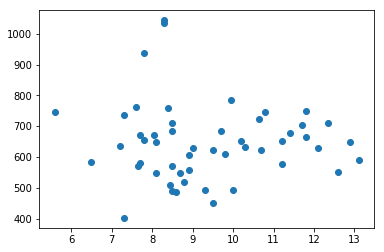

In [102]:
plt.scatter(median_state_diabetes_rate['PCT_DIABETES_ADULTS08'], median_state_diabetes_rate['PC_FFRSALES07'])
plt.show()
# Looks like even after removing proper outliers there's heteroscedasticity, but the relationship looks linear
# It doesn't look strong in any direction though; spending on FFRs (on its own at least) is probably not very explanatory of diabetes rates

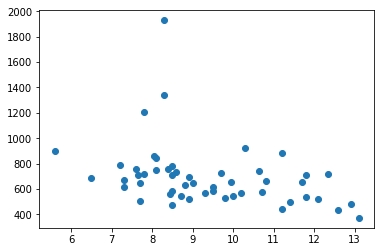

In [104]:
plt.scatter(median_state_diabetes_rate['PCT_DIABETES_ADULTS08'], median_state_diabetes_rate['PC_FSRSALES07'])
plt.show()
# Looks like a weak negative correlation, suggesting that spending on FSRs has an inverse relationship with diabetes rates
# I could see that happening if spending on FSRs is a proxy for wealth, which could serve as a proxy for access to quality food, healthcare, etc.